# Car Price Predection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
 car = pd.read_csv('car data.csv')

In [3]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car.shape

(301, 9)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
car.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
unique_counts = car.nunique()

# Display the unique counts
print("Number of unique values in each column:")
print(unique_counts)

Number of unique values in each column:
Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64


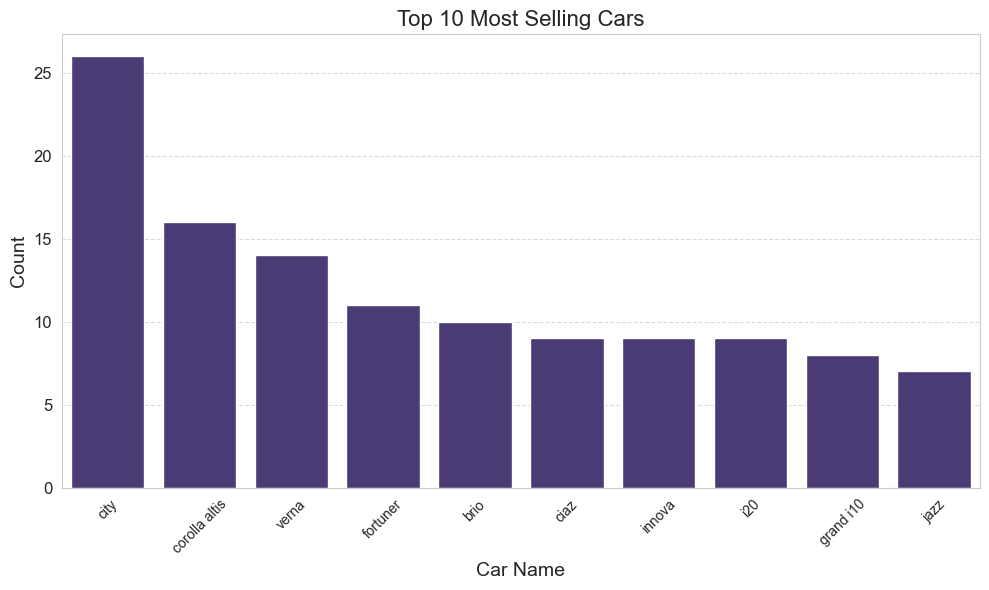

In [9]:

# Count the occurrences of each car name and get the top 10
top10 = car['Car_Name'].value_counts()[:10]

# Create a count plot to visualize the top 10 car names
plt.figure(figsize=(10, 6))

# Use a different color palette (e.g., 'viridis') and change the style
sns.set_style("whitegrid")  # Change the style to 'whitegrid'
sns.set_palette("viridis")   # Change the color palette

# Create the count plot
sns.countplot(x='Car_Name', data=car, order=top10.index)

# Set labels and title for the plot
plt.xlabel('Car Name', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Top 10 Most Selling Cars', fontsize=16)

# Customize the ticks
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()  # Adjust layout to make room for rotated x labels
plt.show()

In [10]:
# Data Wrangling
car['Current Year'] = 2024
car['no_year'] = car['Current Year'] - car['Year']
car.drop(['Current Year', 'Year'], axis=1, inplace=True)

In [11]:
# Handling Outliers
q1, q3 = car['Selling_Price'].quantile([0.25, 0.75])
lower_limit = q1 - 1.5 * (q3 - q1)
upper_limit = q3 + 1.5 * (q3 - q1)
car['Selling_Price'] = np.where(car['Selling_Price'] > upper_limit, car['Selling_Price'].median(), car['Selling_Price'])

In [12]:
# Categorical Encoding
car = pd.get_dummies(car, drop_first=True)

In [13]:
# Feature Selection
features = car.drop('Selling_Price', axis=1)
target = car['Selling_Price']

In [14]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)

In [15]:
# Model Building: Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse, "R2 Score:", r2)

MSE: 2.492783049238104 R2 Score: 0.696581457072799


In [16]:
# Hyperparameter Tuning: Random Forest
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest MSE:", mse_rf, "R2 Score:", r2_rf)

Random Forest MSE: 0.613615272637364 R2 Score: 0.925311489903459
